# model inference

In [1]:
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
from classes import preprocess, eda

c:\users\mdfl0\appdata\local\programs\python\python39\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdfl0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
folder_name = 'text base model v3/svm'
model = 'svm'
df_file = 'text base model v3_1'

# Preprocess the input text
x = preprocess(df='testing_model.csv', added_stopwords='model_stopwords.csv', comment_column='comment_text', dups=0, use_for=0)

x_test = x.df['features_string_format']

# Load the SVM model
svm_model = joblib.load('{}/{}_model_{}.pkl'.format(folder_name, model, df_file))

# Load the vectorizer used during training
vectorizer = joblib.load('{}/{}_vectorizer_{}.pkl'.format(folder_name, model, df_file))

# Load the label encoder
label_encoder = joblib.load('{}/{}_label_encoder_{}.pkl'.format(folder_name, model, df_file))

# Apply the same vectorizer used in training to transform the test data
xtest_vectors = vectorizer.transform(x_test)

# Make predictions using the SVM model
predictions = svm_model.predict(xtest_vectors)

# Convert predictions to integer type
predictions = predictions.astype(int)

# Decode the predicted labels using the label encoder
decoded_predictions = label_encoder.inverse_transform(predictions)

# Print the predicted label
x.df['context_base_prediction'] = decoded_predictions

# convert numeric value to sentiments
sentiment_dict = {
            1: 'neutral',
            2: 'positive',
            0: 'negative',
        }
x.df['context_base_prediction'] = x.df['context_base_prediction'].map(sentiment_dict)

Column Headers:  ['likes', 'comment_text', 'tiktok_user_id', 'created_date', 'replies_num', 'comment_id']
shape of raw dataframe:  (1299, 6)
shape of dataframe when null comments were dropped:  (1299, 8)


In [3]:
x.df.head(20)

,likes,comment_text,tiktok_user_id,created_date,replies_num,comment_id,features,features_string_format,context_base_prediction
0,2472,totoo to taga mariveles bataan ako na inu umpi...,emorej_0711,2023-03-29 18:44:02,58,7216040782222197510,"[totoo, to, taga, mariveles, bataan, inu, umpi...",totoo to taga mariveles bataan inu umpisahan c...,negative
1,4330,manila pang industrial\ncebu at palawan pang t...,katzuph,2023-03-29 05:05:39,51,7215829899037131525,"[manila, industrial, cebu, palawan, tourist, a...",manila industrial cebu palawan tourist attract...,neutral
2,1813,we need more trees,3rri3.kq,2023-03-30 14:54:21,54,7216352720482255621,"[we, need, more, trees]",we need more trees,neutral
3,867,they need to get rid of the corruption in the ...,justme080321,2023-04-01 14:55:48,26,7217095238443008773,"[they, need, to, get, rid, of, the, corruption...",they need to get rid of the corruption in the ...,neutral
4,474,Hoping for the success of these projects,dianesaysondelacruz,2023-04-02 06:43:54,0,7217339547125121798,"[hoping, for, the, success, of, these, projects]",hoping for the success of these projects,neutral
5,538,Sandro once said\nIn every issue na ibabato ni...,renaissance024,2023-04-02 22:06:00,11,7217577188680450821,"[sandro, once, said, in, every, issue, ibabato...",sandro once said in every issue ibabato sayo i...,negative
6,131,I like tree's more than city's.,hanlvrsx,2023-04-02 01:18:25,20,7217255681337312005,"[like, trees, more, than, citys]",like trees more than citys,positive
7,526,Sabi pa nga nila busy daw kaka out of the coun...,its.maryil,2023-04-19 07:29:17,22,7223659649798406917,"[busy, kaka, out, of, the, country, hindi, ala...",busy kaka out of the country hindi alam pledge...,negative
8,6,bat kasi ako nabuhay ng maaga,meizerys,2023-05-20 03:33:24,0,7235102596133520134,"[bakit, nabuhay, maaga]",bakit nabuhay maaga,neutral
9,5,I hope they also pay attention to health insur...,misschamp,2023-05-06 17:51:35,2,7230128510257201963,"[hope, they, also, pay, attention, to, health,...",hope they also pay attention to health insuran...,neutral


In [4]:
x.df.shape

(1299, 9)

In [5]:
x.df['context_base_prediction'].value_counts()

neutral     714
negative    444
positive    141
Name: context_base_prediction, dtype: int64

In [6]:
model_df = x.df

# exploratory data analysis

1    714
0    444
2    141
Name: context_base_prediction, dtype: int64


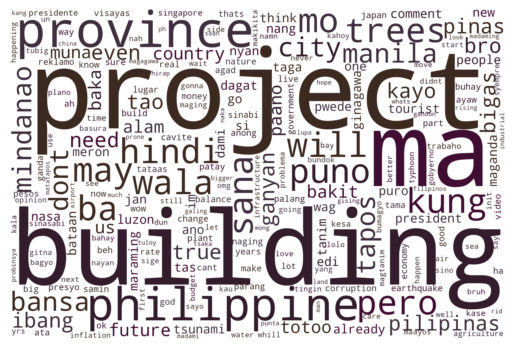

In [7]:
model_eda = eda(df=model_df, text_column_name='features_string_format', sent_column_name='context_base_prediction', folder='model vis')
model_eda.generate_wordcloud()

In [8]:
model_df['context_base_prediction'].value_counts()

1    714
0    444
2    141
Name: context_base_prediction, dtype: int64

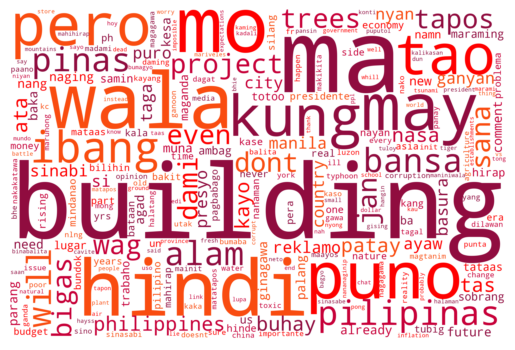

In [9]:
model_eda.generate_wordcloud(value=0)

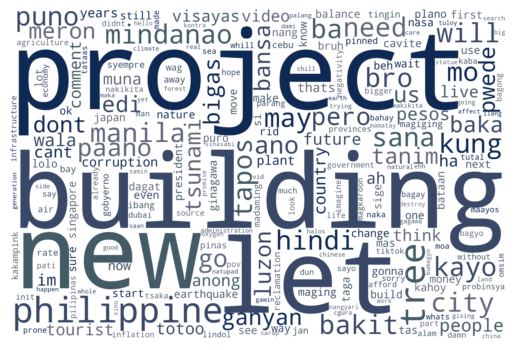

In [10]:
model_eda.generate_wordcloud(value=1)

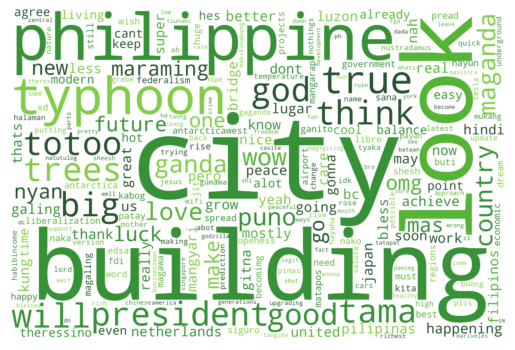

In [11]:
model_eda.generate_wordcloud(value=2)

In [12]:
x.df.to_csv("predicted.csv")